<a href="https://colab.research.google.com/github/tackulus/204383/blob/main/Code09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **09 Lowpass & Highpass Filtering**

> **204383 Image Processing** 

---

> **Tocktack | Kasidis Torcharoen (610510531)** \\
**Top | Kittisak Thammawong (610510611)**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

In [7]:
img = cv.imread('0302.jpg')
channels = img.shape[2]

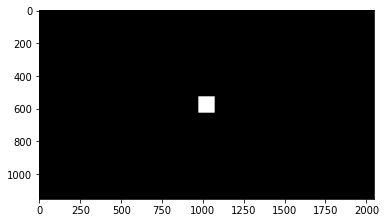

In [8]:
def draw_circle(shape, D):
    TF = np.zeros(shape, dtype=np.bool)
    c = np.array(shape) // 2
    TF[c[0]-D:c[0]+D, c[1]-D:c[1]+D] = True 
    return TF.astype(int)

low_mask   = draw_circle(img.shape[:2], D=50)
high_mask  = 1 - low_mask

plt.imshow(low_mask, cmap='gray')

In [9]:
fft_img = np.zeros_like(img, dtype=complex)
for ch in range(channels):
    fft_img[..., ch] = np.fft.fftshift(np.fft.fft2(img[..., ch]))

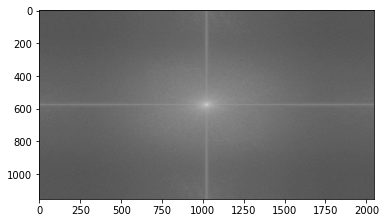

In [10]:
def imshow_fft(fft):
    magnitude_spectrum = 20 * np.log(np.abs(fft))
    return plt.imshow(magnitude_spectrum, cmap="gray")

imshow_fft(fft_img[..., 0])
imshow_fft(fft_img[..., 1])
imshow_fft(fft_img[..., 2])

In [1]:
def filter_circle(mask, fft_img_ch):
    temp = np.zeros(img.shape[:2], dtype=complex)
    temp[mask] = fft_img_ch[mask]
    return temp

fft_img_low = []
fft_img_high = []
## for each channel, pass filter
for ch in range(channels):
    fft_img_ch = fft_img[..., ch]
    ## low pass
    temp = filter_circle(low_mask, fft_img_ch)
    fft_img_low.append(temp)
    ## high pass
    temp = filter_circle(high_mask, fft_img_ch)
    fft_img_high.append(temp) 
    
fft_img_low = np.array(fft_img_low)
fft_img_low = np.transpose(fft_img_low, (1,2,0))
fft_img_high = np.array(fft_img_high)
fft_img_high = np.transpose(fft_img_high, (1,2,0))

NameError: ignored

In [ ]:
def inv_FFT_all_channel(fft_img):
    img_reco = []
    for ichannel in range(fft_img.shape[2]):
        img_reco.append(np.fft.ifft2(np.fft.ifftshift(fft_img[:,:,ichannel])))
    img_reco = np.array(img_reco)
    img_reco = np.transpose(img_reco,(1,2,0))
    return(img_reco)

img_reco              = inv_FFT_all_channel(fft_img)
img_reco_filtered_IN  = inv_FFT_all_channel(fft_img_filtered_IN)
img_reco_filtered_OUT = inv_FFT_all_channel(fft_img_filtered_OUT)